<a href="https://colab.research.google.com/github/saishrane06/Exploratory-Data-Analysis/blob/main/EDA_SuperMarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download abhilashakumari100/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 23.1MB/s]


In [2]:
! unzip supermarket-sales.zip

Archive:  supermarket-sales.zip
  inflating: supermarket_sales.csv   


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
sales_df = pd.read_csv("supermarket_sales.csv")
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
sales_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [9]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [21]:
sales_df.shape

(1003, 17)

In [23]:
## Finding columns having nan values

print("Columns having null values:")
for i in sales_df.columns:
  if sales_df[i].isna().any():
    print(i," ",sales_df[i].isna().sum())

Columns having null values:
Customer type   79
Product line   43
Unit price   7
Quantity   20


In [24]:
## Finding the columns having object as dtype and then printing the unique values of the column.
for i in sales_df.columns:
  if sales_df[i].dtype == 'object':
    print("\n")
    print(i)
    print("\n")
    print(sales_df[i])
    print("\n")
    print("Unique values of",i,"is \n",sales_df[i].unique())



Invoice ID


0       750-67-8428
1       226-31-3081
2       631-41-3108
3       123-19-1176
4       373-73-7910
           ...     
998     347-56-2442
999     849-09-3807
1000    849-09-3807
1001    745-74-0715
1002    452-04-8808
Name: Invoice ID, Length: 1003, dtype: object


Unique values of Invoice ID is 
 ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '6

In [26]:
sales_df = sales_df.drop("Invoice ID",axis=1)

In [27]:
sales_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### **Univariate Analysis**

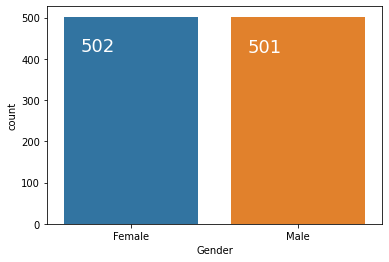

In [31]:
gender_count_sales = sns.countplot(x=sales_df["Gender"])
for p in gender_count_sales.patches:
    gender_count_sales.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

## Almost same number of males and females come to supermarket

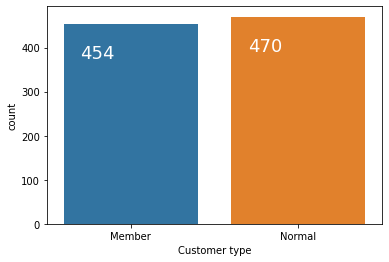

In [32]:
customer_type_sales = sns.countplot(x=sales_df['Customer type'])
for p in customer_type_sales.patches:
    customer_type_sales.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

## There is slightly more sales from Normal customer type with respect to customer who are Member of the super market.

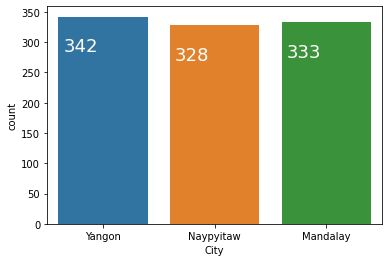

In [33]:
city_sales = sns.countplot(x=sales_df['City'])
for p in city_sales.patches:
    city_sales.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

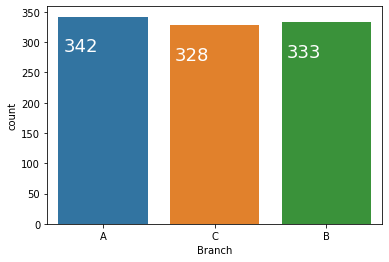

In [34]:
branch_sales = sns.countplot(x=sales_df['Branch'])
for p in branch_sales.patches:
    branch_sales.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

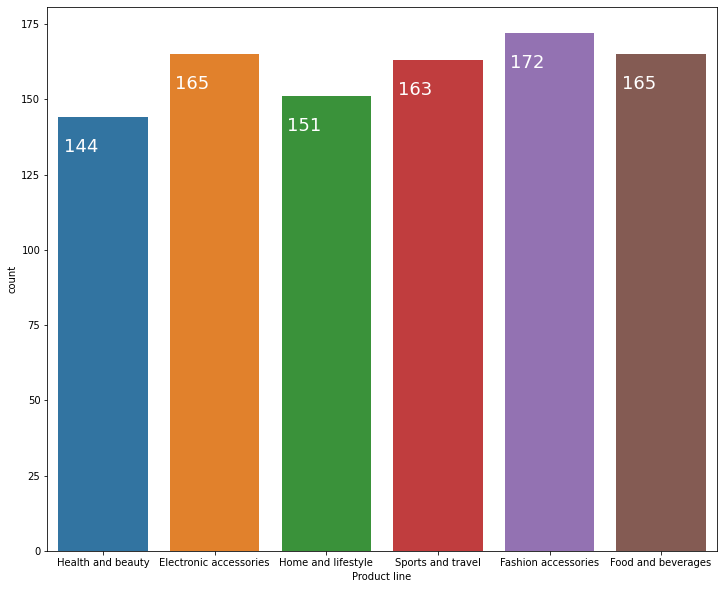

In [41]:
plt.figure(figsize=(12,10))
product_line_sales = sns.countplot(x=sales_df['Product line'])
for p in product_line_sales.patches:
    product_line_sales.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

## Highest sales from the supermarket are from Fashion Accessiories,Food and Beverages, Electronics Accessiories, Sports and Travels 

### **Bi-Variate Analysis**

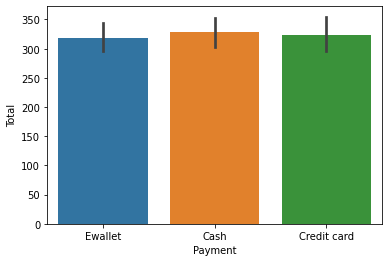

In [53]:
sns.barplot(x=sales_df['Payment'],y=sales_df['Total'])
## From this we can see which payment type is used the most while payment of the product.

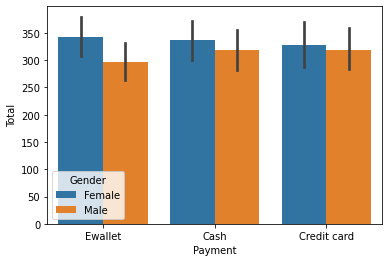

In [54]:
sns.barplot(x=sales_df['Payment'],y=sales_df['Total'],hue=sales_df['Gender'])
## Here we can see that Ewallet and cash payment type are most used by females and the credit card payment type are used at same frequency 
## by male and female

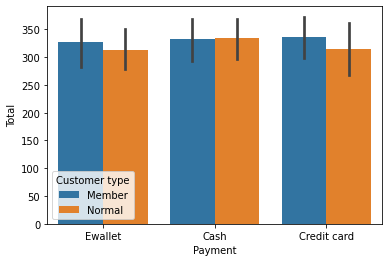

In [56]:
sns.barplot(x=sales_df['Payment'],y=sales_df['Total'],hue=sales_df['Customer type'])
## Customer Type Member uses Ewallet and credit card more as payment type w.r.t. normal customer type.
## Cash Payment are done at same frequency by both the customer type

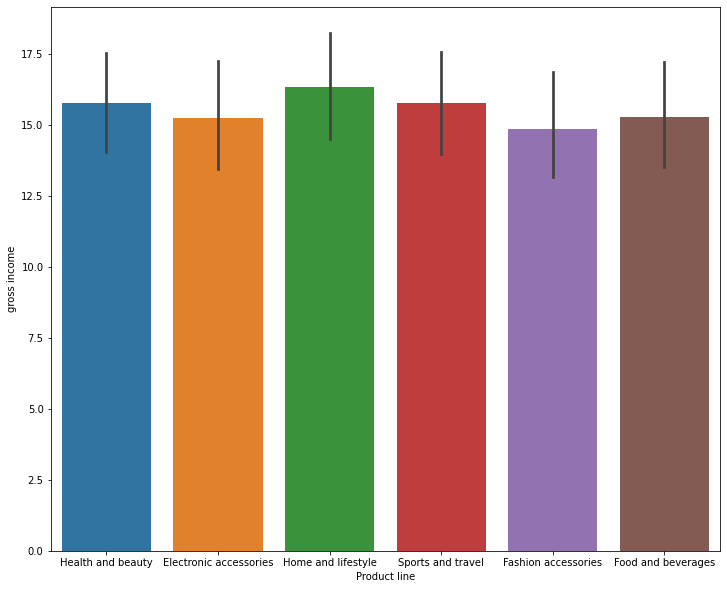

In [66]:
plt.figure(figsize=(12,10))
sns.barplot(x=sales_df['Product line'],y=sales_df['gross income'])

In [63]:
sales_df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.015664,0.634288,0.634288,0.634288,NaN,0.634288,-0.007891
Quantity,0.015664,1.000000,0.709165,0.709165,0.709165,NaN,0.709165,-0.022802
Tax 5%,0.634288,0.709165,1.000000,1.000000,1.000000,NaN,1.000000,-0.038591
Total,0.634288,0.709165,1.000000,1.000000,1.000000,NaN,1.000000,-0.038591
cogs,0.634288,0.709165,1.000000,1.000000,1.000000,NaN,1.000000,-0.038591
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.634288,0.709165,1.000000,1.000000,1.000000,NaN,1.000000,-0.038591
Rating,-0.007891,-0.022802,-0.038591,-0.038591,-0.038591,NaN,-0.038591,1.000000


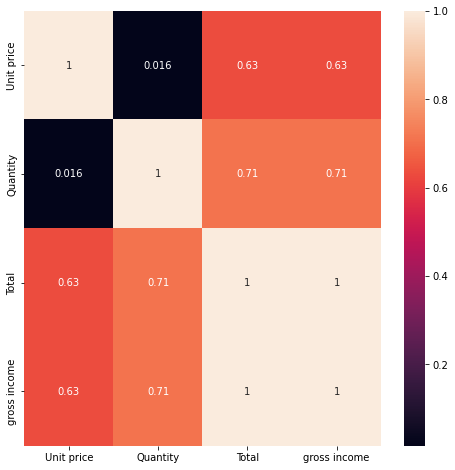

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(sales_df[['Unit price','Quantity','Total','gross income']].corr(),annot=True)

In [71]:
sales_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


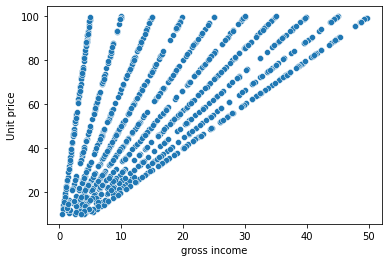

In [75]:
sns.scatterplot(x=sales_df['gross income'],y=sales_df['Unit price'])

### **Multi-Variate Analysis**

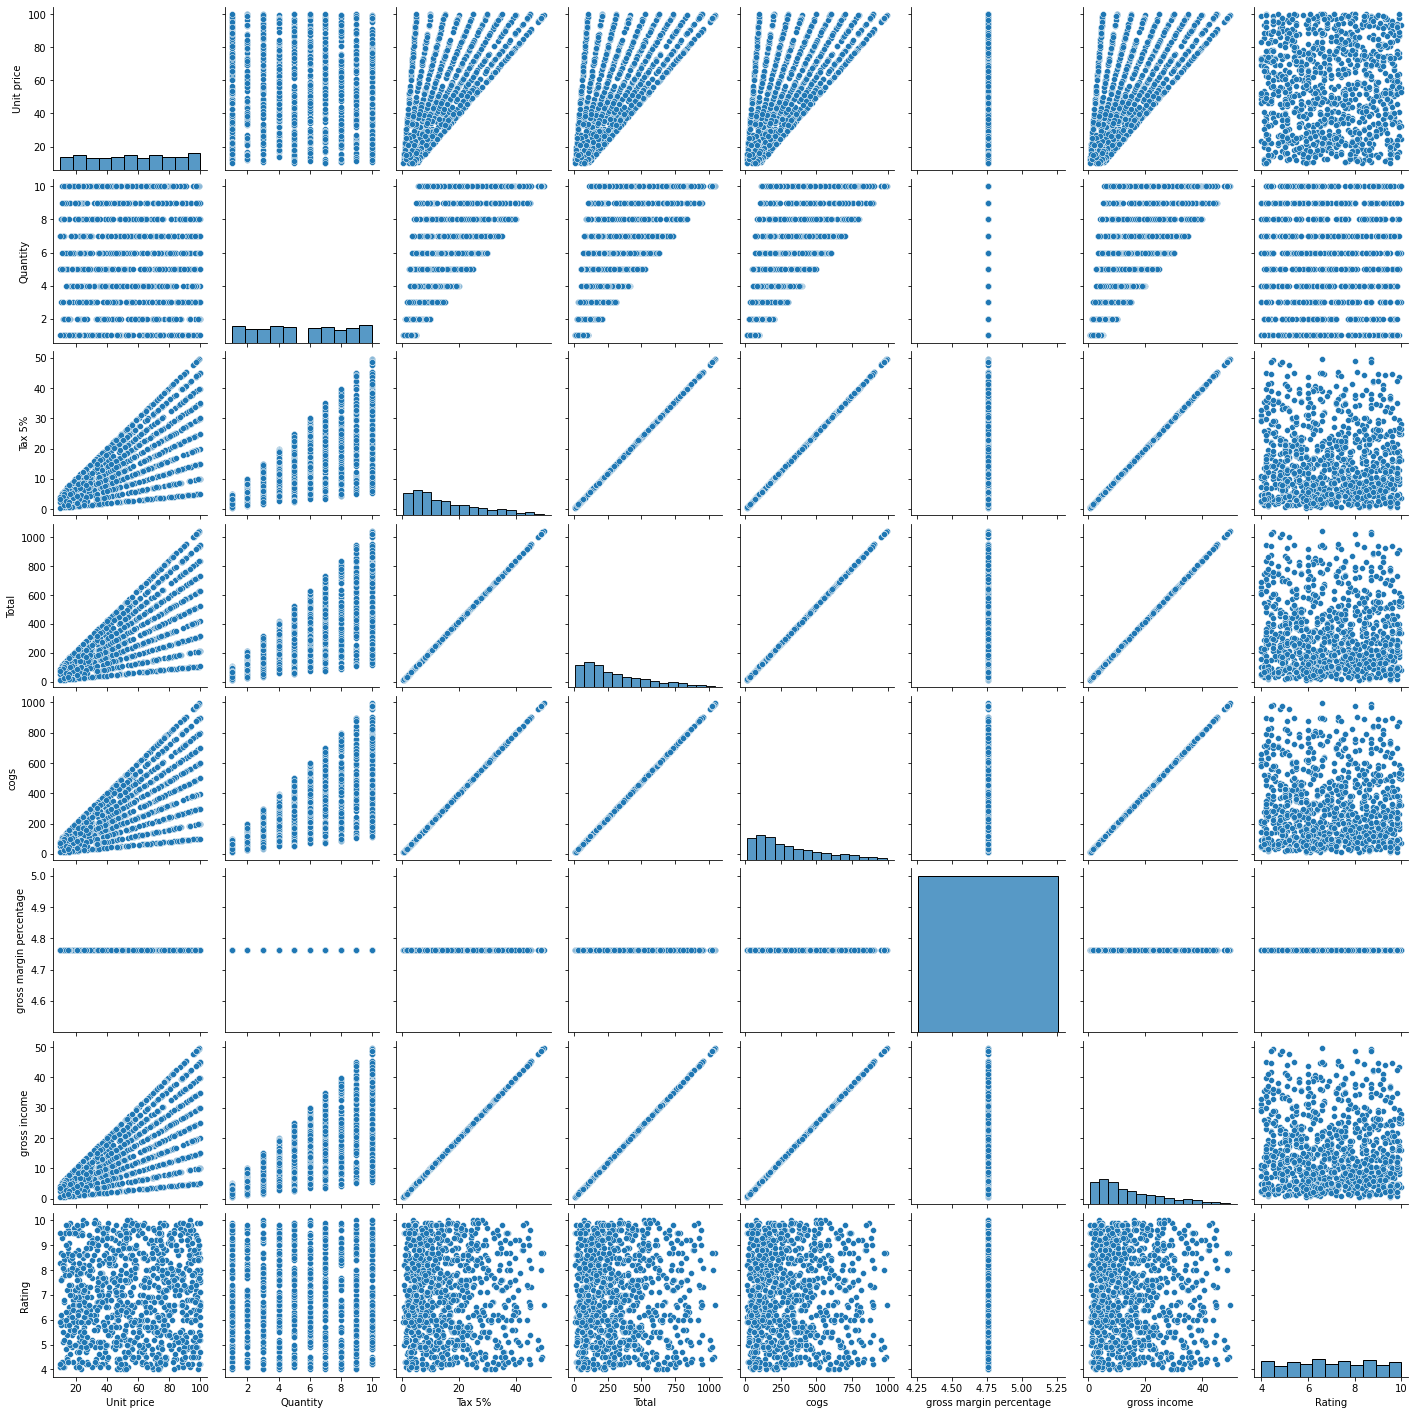

In [76]:
sns.pairplot(sales_df)